# BEATS KBLT tomopy recon test 01
#### Reconstruction of CONTINUOUS SCAN - KBLTdataset 1 <br />
Author: [Gianluca Iori](mailto:gianluca.iori@sesame.org.jo)<br />
Created on: 06-11-2020 <br />
Modified on: 24-03-2022 <br />

see also:
https://tomopy.readthedocs.io/en/latest/ipynb/tomopy.html

#### Activate TomoPy kernel in Jupyter:
`conda env list`

`source activate tomopy`

`python -m ipykernel install --user --name tomopy_source --display-name "conda (tomopy_source)"`

`jupyter notebook &`

In [2]:
%%html
<style>
table {float:left}
</style>

In [3]:
import os
import dxchange
import tomopy
import numpy as np
import h5py
import matplotlib
import matplotlib.pyplot as plt
# import recon_utils

astropy module not found


In [4]:
matplotlib.rcParams['figure.dpi'] = 150

In [5]:
import logging
logging.basicConfig(level=logging.INFO)

In [25]:
# SESAME
h5file = "/mnt/hdf/kblt_test_spring_01_324.h5"
h5file_darks = "/mnt/hdf/kblt_test_spring_01_darks_326.h5"
h5file_flats = "/mnt/hdf/kblt_test_spring_01_flats_327.h5"
path_recon = "/mnt/hdf/recon/kblt_test_spring_01/"

In [6]:
# thk_debian
h5file = "/home/gianthk/Data/BEATS/kblt/calamaro/KBLT_test_calamaro_075.h5"
h5file_darks = "/home/gianthk/Data/BEATS/kblt/calamaro/KBLT_test_calamaro_darks_004.h5"
h5file_flats = "/home/gianthk/Data/BEATS/kblt/calamaro/KBLT_test_calamaro_flats_003.h5"
path_recon = "/home/gianthk/Data/BEATS/kblt/calamaro/recon/"

#### Read HDF5 data
- The `.read_aps_32id()` method of DXchange can read TOMCAT .h5 data
- If run without arguments (proj..), the import seem to be virtual (mem map)? I don't see this data in the RAM and I can reconstruct the whole volume on my laptop

In [7]:
# read the projections
projs, flats, darks, theta = dxchange.read_aps_32id(h5file, exchange_rank=0)

INFO:dxchange.reader:Data successfully imported: /home/gianthk/Data/BEATS/kblt/calamaro/KBLT_test_calamaro_075.h5
INFO:dxchange.reader:Data successfully imported: /home/gianthk/Data/BEATS/kblt/calamaro/KBLT_test_calamaro_075.h5
INFO:dxchange.reader:Data successfully imported: /home/gianthk/Data/BEATS/kblt/calamaro/KBLT_test_calamaro_075.h5
INFO:dxchange.reader:Data successfully imported: /home/gianthk/Data/BEATS/kblt/calamaro/KBLT_test_calamaro_075.h5
INFO:dxchange.reader:Data successfully imported: /home/gianthk/Data/BEATS/kblt/calamaro/KBLT_test_calamaro_075.h5
INFO:dxchange.reader:Data successfully imported: /home/gianthk/Data/BEATS/kblt/calamaro/KBLT_test_calamaro_075.h5


In [8]:
print(projs.shape[:])
print(projs.dtype)

(101, 2160, 1200)
uint16


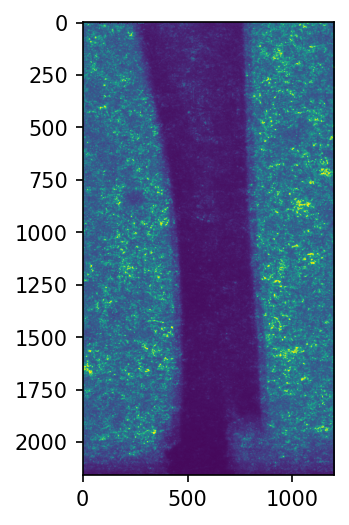

In [10]:
plt.imshow(projs[50, :, :])
plt.show()

Check if theta exists

In [11]:
theta

array([0.        , 0.03141592, 0.06283185, 0.09424778, 0.1256637 ,
       0.15707964, 0.18849556, 0.21991149, 0.2513274 , 0.28274336,
       0.31415927, 0.34557518, 0.37699112, 0.40840703, 0.43982297,
       0.47123888, 0.5026548 , 0.53407073, 0.5654867 , 0.5969026 ,
       0.62831855, 0.6597344 , 0.69115037, 0.7225663 , 0.75398225,
       0.7853982 , 0.81681406, 0.84823   , 0.87964594, 0.9110619 ,
       0.94247776, 0.9738937 , 1.0053096 , 1.0367256 , 1.0681415 ,
       1.0995574 , 1.1309735 , 1.1623893 , 1.1938052 , 1.225221  ,
       1.2566371 , 1.288053  , 1.3194689 , 1.3508849 , 1.3823007 ,
       1.4137167 , 1.4451326 , 1.4765486 , 1.5079645 , 1.5393803 ,
       1.5707964 , 1.6022123 , 1.6336281 , 1.6650441 , 1.69646   ,
       1.727876  , 1.7592919 , 1.7907078 , 1.8221238 , 1.8535396 ,
       1.8849555 , 1.9163716 , 1.9477874 , 1.9792033 , 2.0106192 ,
       2.042035  , 2.0734513 , 2.104867  , 2.136283  , 2.1676989 ,
       2.1991148 , 2.2305307 , 2.261947  , 2.2933626 , 2.32477

If the angular information is not avaialable from the raw data you need to set the data collection angles. In this case, theta is set as equally spaced between 0-180 degrees.

In [10]:
if theta is None:
    theta = tomopy.angles(projs.shape[0])

#### Read flats and darks from another scan
We forgot to colelct flats and darks! Flats and darks are taken from a previous scan (separate files) and need to be cropped to the same ROI

In [14]:
# read the flats
tmp, flats, tmp2, tmp3 = dxchange.read_aps_32id(h5file_flats)

INFO:dxchange.reader:Data successfully imported: /home/gianthk/Data/BEATS/kblt/calamaro/KBLT_test_calamaro_flats_003.h5
INFO:dxchange.reader:Data successfully imported: /home/gianthk/Data/BEATS/kblt/calamaro/KBLT_test_calamaro_flats_003.h5
INFO:dxchange.reader:Data successfully imported: /home/gianthk/Data/BEATS/kblt/calamaro/KBLT_test_calamaro_flats_003.h5
INFO:dxchange.reader:Data successfully imported: /home/gianthk/Data/BEATS/kblt/calamaro/KBLT_test_calamaro_flats_003.h5
INFO:dxchange.reader:Data successfully imported: /home/gianthk/Data/BEATS/kblt/calamaro/KBLT_test_calamaro_flats_003.h5


In [15]:
print(flats.shape[:])

(10, 2160, 2560)


In [23]:
# read the darks
tmp, tmp2, darks, tmp3 = dxchange.read_aps_32id(h5file_darks)

INFO:dxchange.reader:Data successfully imported: /home/gianthk/Data/BEATS/kblt/calamaro/KBLT_test_calamaro_darks_004.h5
INFO:dxchange.reader:Data successfully imported: /home/gianthk/Data/BEATS/kblt/calamaro/KBLT_test_calamaro_darks_004.h5
INFO:dxchange.reader:Data successfully imported: /home/gianthk/Data/BEATS/kblt/calamaro/KBLT_test_calamaro_darks_004.h5
INFO:dxchange.reader:Data successfully imported: /home/gianthk/Data/BEATS/kblt/calamaro/KBLT_test_calamaro_darks_004.h5
INFO:dxchange.reader:Data successfully imported: /home/gianthk/Data/BEATS/kblt/calamaro/KBLT_test_calamaro_darks_004.h5


In [24]:
print(darks.shape[:])

(10, 2160, 2560)


#### Crop flats and darks
Scan ROI info is stored in the HDF5 metadata at `/measurement/instrument/detector/roi/`

In [ ]:
# dxchange.reader.read_dx_meta(h5file) # does not work

In [28]:
# ROI info read manually with Silx
flats_crop = flats[:, :, 800:2000]
darks_crop = darks[:, :, 800:2000]
print(flats_crop.shape[:])

(10, 2160, 1200)


In [29]:
np.max(projs[:])

65535

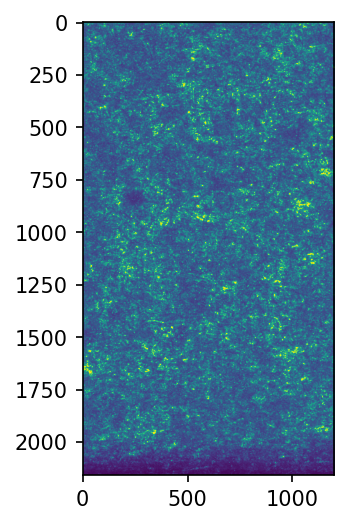

In [30]:
plt.imshow(flats[1, :, 800:2000])
plt.show()

#### Flat field correction

In [31]:
projs_crop_corr = tomopy.normalize(projs, flats_crop, darks_crop)
# print(projs.dtype)

#### Calculate $ -log(projs) $ to linearize transmission tomography data.

In [32]:
projs_crop_corr = tomopy.minus_log(projs_crop_corr)

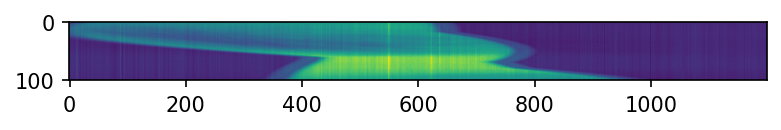

In [34]:
plt.imshow(projs_crop_corr[:, 20, :])
plt.show()

Free some space

In [35]:
del projs

#### Automatic detect Center Of Rotation (COR)

In [43]:
COR = tomopy.find_center_vo(projs_crop_corr)
print(COR)

544.0


In [74]:
del recon

In [ ]:
COR = tomopy.find_center(projs_crop_corr, theta, init=projs_crop_corr.shape[2]/2, ind=1000, tol=0.5)
print(COR)

#### Save images reconstructed with a range of rotation centers

In [64]:
path_test = "/home/gianthk/Data/BEATS/kblt/calamaro/test/"

In [76]:
tomopy.write_center(projs_crop_corr, theta, path_test, [491, 510, 1])

INFO:tomopy.recon.algorithm:Reconstructing 19 slice groups with 8 master threads...


#### Reconstruction with CPU
|  |  |
| :--- | :--- |
| **Algorithm**      | `gridrec` |
| **COR**   | Auto COR from step above seems to have an offset |


In [77]:
recon = tomopy.recon(projs_crop_corr, theta, center=498, algorithm='gridrec', sinogram_order=False)

INFO:tomopy.recon.algorithm:Reconstructing 8 slice groups with 8 master threads...


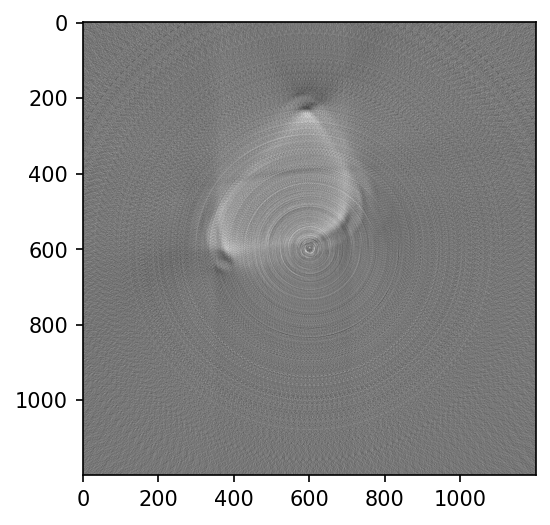

In [63]:
plt.imshow(recon[1800, :, :], cmap='gray')
plt.show()

In [78]:
recon.dtype

dtype('float32')

#### Apply circular mask

In [79]:
recon = tomopy.circ_mask(recon, axis=0, ratio=0.95)

Visualize results

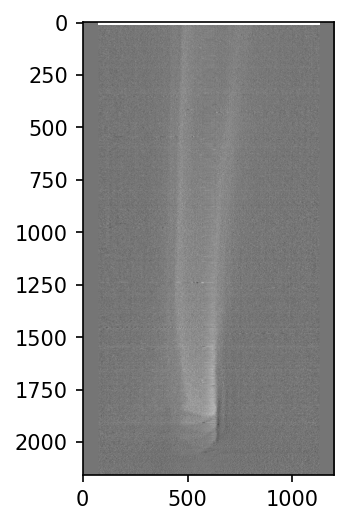

In [80]:
plt.imshow(recon[:, :, 380], cmap='gray')
plt.show()

#### Scale to 0-255 (`uint8`)
The uint8 GV range for output slices can cover the full float32 range or be selected based on the 3D data histogram

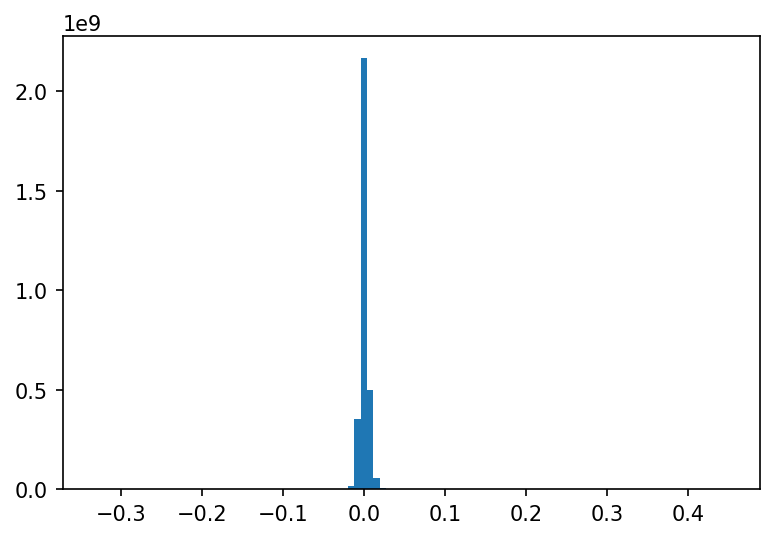

In [81]:
plt.hist(recon.ravel(), bins=100)
plt.show()

In [24]:
# uint8 GV range from data histogram (0.01 and 0.99 quantiles)
[range_min, q_95] = 1.1*np.quantile(recon.ravel(), [0.01, 0.99])
range_max = q_95 - range_min
print(range_min, range_max)

-0.006460846308618784 0.02500996766611934


In [82]:
# uint8 GV range as MIN and MAX of 3D data
range_min = np.min(recon)
range_max = np.max(recon)
range_max = range_max - range_min

In [83]:
recon_uint8Range = 255*((recon - range_min)/range_max)

In [84]:
recon_uint8Range[recon_uint8Range < 0] = 0

MemoryError: Unable to allocate 2.90 GiB for an array with shape (2160, 1200, 1200) and data type bool

In [27]:
recon_uint8Range[recon_uint8Range > 255] = 255

In [30]:
# apply again circ mask
recon_uint8Range = tomopy.circ_mask(recon_uint8Range, axis=0, ratio=0.95)

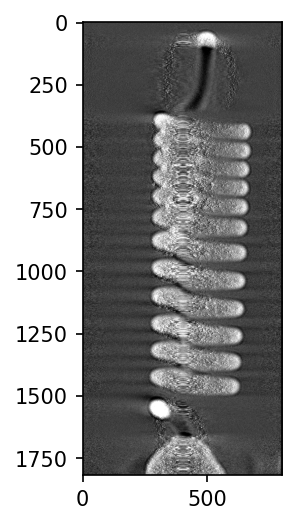

In [32]:
plt.imshow(recon_uint8Range[:, 300, :], cmap='gray')
plt.show()

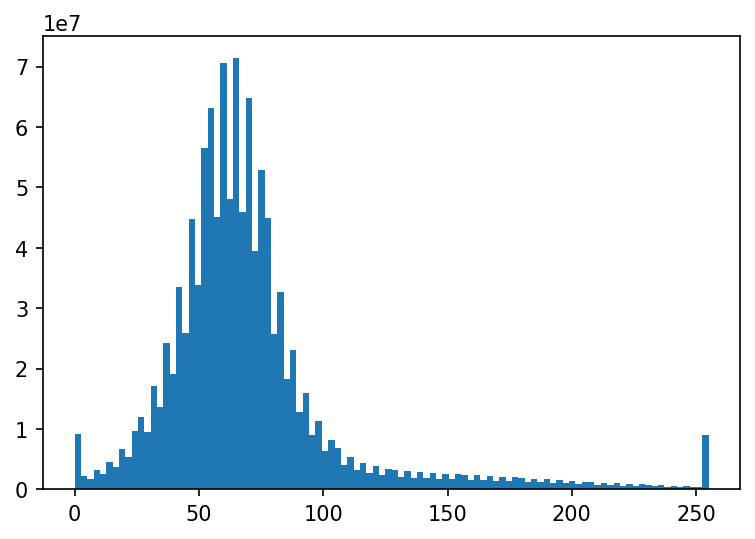

In [29]:
plt.hist(recon_uint8Range.round().ravel(), bins=100)
plt.show()

#### Write output Tiff stack as `uint8`

In [85]:
fileout = path_recon+'kblt_calamaro.tiff'
dxchange.writer.write_tiff_stack(recon, fname=fileout, axis=0, digit=5, start=0, overwrite=True)

In [30]:
fileout = path_recon+'kblt_spring_test_01.tiff'
dxchange.writer.write_tiff_stack(recon_uint8Range, fname=fileout, dtype='uint8', axis=0, digit=5, start=0, overwrite=True)

#### Open virtual stack in ImageJ

In [19]:
os.system(Fiji_exe_stack + '/home/gianthk/Data/StefanFly_test/test_00_/rec_8bit_0/test_00_001.rec.8bit.tif &')

0

#### Save images reconstructed with a range of rotation centers.

In [35]:
tomopy.write_center(projs, theta, dpath=path_recon+'tmp/COR', cen_range=[COR-10, COR+10, 1], ind=500, mask=True, ratio=1.0, algorithm='gridrec', filter_name='parzen')

Reconstructing 20 slice groups with 8 master threads...


View them in Fiji

In [64]:
os.system(Fiji_exe_stack + path_recon+'tmp/COR/'+'{:04.2f}'.format(COR[0])+'.tiff &')

0

Optimize the reconstruction around given COR

In [67]:
tomopy.write_center(projs, theta, dpath=path_recon+'tmp/COR', cen_range=[482, 490, 0.5], ind=500, mask=True, ratio=1.0, algorithm='gridrec', filter_name='parzen')

Reconstructing 16 slice groups with 8 master threads...


View them in Fiji

In [69]:
os.system(Fiji_exe_stack + path_recon+'tmp/COR/482.00.tiff &')

0